## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Underfit model

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/sample - loss: 1.1944 - acc: 0.5670 - val_loss: 0.6378 - val_acc: 0.7906
Epoch 2/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.9278 - acc: 0.6520 - val_loss: 0.5713 - val_acc: 0.8016
Epoch 3/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.8859 - acc: 0.6655 - val_loss: 0.5540 - val_acc: 0.8096
Epoch 4/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.8724 - acc: 0.6703 - val_loss: 0.5517 - val_acc: 0.8066
Epoch 5/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.8586 - acc: 0.6748 - val_loss: 0.5594 - val_acc: 0.8027
Epoch 6/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.8466 - acc: 0.6790 - val_loss: 0.5383 - val_acc: 0.8123
Epoch 7/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.8441 - acc: 0.6809 - val_loss: 0.

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.4737 - acc: 0.8364
Test accuracy: 0.8364


Since the training accuracy is quite low, this model is underfit to the data and is not complex enough to accurately describe it.

## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

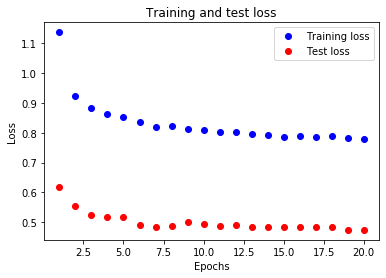

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

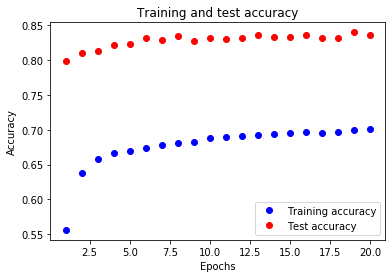

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Overfit model

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4908 - acc: 0.8257 - val_loss: 0.4178 - val_acc: 0.8487
Epoch 2/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3635 - acc: 0.8677 - val_loss: 0.3788 - val_acc: 0.8628
Epoch 3/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3261 - acc: 0.8798 - val_loss: 0.3652 - val_acc: 0.8705
Epoch 4/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2993 - acc: 0.8896 - val_loss: 0.3471 - val_acc: 0.8785
Epoch 5/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2801 - acc: 0.8970 - val_loss: 0.3358 - val_acc: 0.8785
Epoch 6/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2667 - acc: 0.9015 - val_loss: 0.3392 - val_acc: 0.8817
Epoch 7/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2538 - acc: 0.9039 - val_loss: 0.

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.3821 - acc: 0.8846
Test accuracy: 0.8846


Since the test accuracy is less than the training accuracy, this model is overfit to the data and too complex to accurately describe it.

## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

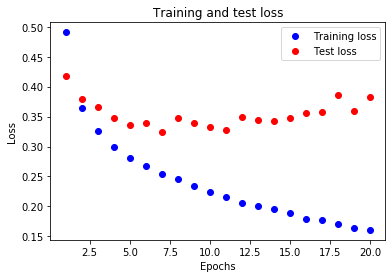

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

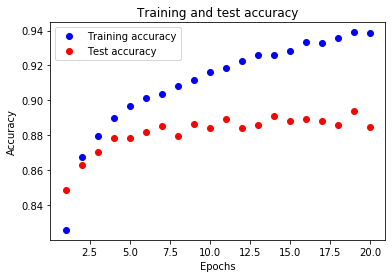

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# "Pretty good" model

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.softmax),
    keras.layers.Dropout(.2),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(.2),
    keras.layers.Dense(256, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 97us/sample - loss: 1.5987 - acc: 0.3842 - val_loss: 0.7777 - val_acc: 0.7107
Epoch 2/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.7889 - acc: 0.7045 - val_loss: 0.5310 - val_acc: 0.8149
Epoch 3/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.6436 - acc: 0.7761 - val_loss: 0.4892 - val_acc: 0.8293
Epoch 4/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.5710 - acc: 0.8027 - val_loss: 0.4750 - val_acc: 0.8324
Epoch 5/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.5276 - acc: 0.8180 - val_loss: 0.4487 - val_acc: 0.8472
Epoch 6/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4894 - acc: 0.8284 - val_loss: 0.4491 - val_acc: 0.8431
Epoch 7/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4661 - acc: 0.8359 - val_loss: 0.

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.3915 - acc: 0.8664
Test accuracy: 0.8664


Since the test accuracy is very close to the training accuracy, this model is neither underfit not overfit.

## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

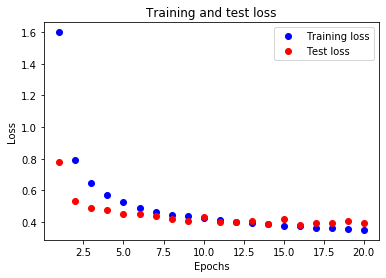

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

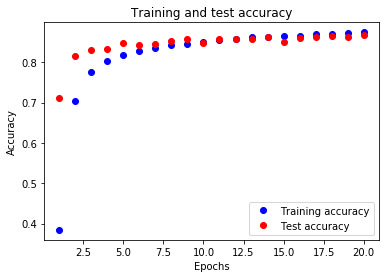

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()